Classificação
=============

Classificação
=============

## Funções de ativação
As funções de ativação desempenham um papel fundamental em redes neurais e perceptrons na aprendizagem profunda (deep learning), pois determinam como um neurônio ou perceptron responde a estímulos e transfere informações para a camada seguinte. Aqui estão explicações para quatro funções de ativação comuns: Threshold, Sigmoid, ReLU (Rectified Linear Unit) e Tanh (Tangente Hiperbólica).

1. **Threshold (Degrau) Function:**
   - Também conhecida como a função degrau ou função de ativação binária.
   - Esta é uma função simples que produz uma saída binária (0 ou 1) com base em um limite (threshold).
   - Se a soma ponderada das entradas excede o limite, a saída é 1; caso contrário, a saída é 0.
   - É raramente usada em redes neurais modernas devido à sua natureza não diferenciável, o que torna o treinamento mais difícil.

2. **Sigmoid Function:**
   - A função sigmoide é uma função de ativação suave e contínua.
   - Ela mapeia qualquer número real para o intervalo (0, 1).
   - É **usada para problemas de classificação binária** e em camadas intermediárias de redes neurais antigas.
   - No entanto, tem um problema de desvanecimento do gradiente que pode dificultar o treinamento de redes profundas.

3. **ReLU (Rectified Linear Unit):**
   - A função ReLU é uma das funções de ativação mais populares na aprendizagem profunda.
   - Ela é definida como f(x) = max(0, x), ou seja, retorna x se x for positivo e 0 caso contrário.
   - A função ReLU é diferenciável em todos os lugares, exceto quando x é zero, mas mesmo nesse ponto é comum tratá-la como tendo derivada zero.
   - ReLU superou o Sigmoid e o Tangente Hiperbólico em popularidade devido à sua simplicidade e eficácia na aceleração do treinamento de redes profundas.

4. **Tanh (Tangente Hiperbólica):**
   - A função tangente hiperbólica é semelhante à função sigmoide, mas mapeia números reais para o intervalo (-1, 1).
   - Ela é usada para problemas de regressão e classificação.
   - Assim como o sigmoid, o tanh pode sofrer com problemas de desvanecimento do gradiente em redes muito profundas, embora em menor medida.

A escolha da função de ativação depende do problema que você está resolvendo, da arquitetura da rede e do comportamento desejado. O ReLU é uma escolha comum devido à sua eficácia na aceleração do treinamento, mas outras funções ainda têm seus usos, especialmente em casos específicos de problemas. Em muitos casos, funções de ativação variantes do ReLU, como Leaky ReLU, Parametric ReLU (PReLU), e Exponential Linear Unit (ELU), são preferidas, pois abordam algumas das limitações do ReLU original.



## Imports

In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from keras.layers import Dense, Activation, Dropout, Flatten
from keras.models import Sequential
from keras.callbacks import EarlyStopping

## Configs

In [3]:
np.set_printoptions(suppress=True)
PLOT_WIDE = (14,7)

## Load data

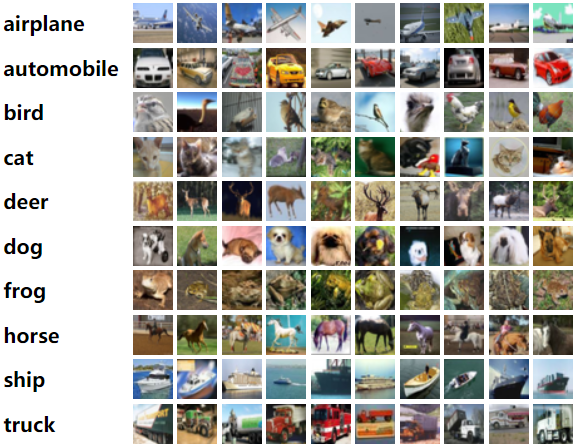

In [4]:
# Load data from dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [5]:
print('shape x_train: ', x_train.shape, ' características de treinamento 50k, matrizes 32x32 e 3 cores (RGB)')
print('shape x_test: ', x_test.shape, ' características de test 10k, matrizes 32x32 e 3 cores (RGB)')
print('sahpe y_test: ', y_test.shape, 'características do resultado, 1 dimensão, 10k')

shape x_train:  (50000, 32, 32, 3)  características de treinamento 50k, matrizes 32x32 e 3 cores (RGB)
shape x_test:  (10000, 32, 32, 3)  características de test 10k, matrizes 32x32 e 3 cores (RGB)
sahpe y_test:  (10000, 1) características do resultado, 1 dimensão, 10k


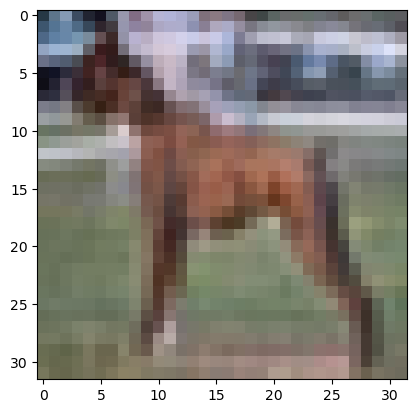

In [6]:
# Escolhendo uma imagem para plotar
sample = np.random.randint(len(x_train)-1)
image = x_train[sample]

# Plotando a imagem
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

## 2. Pré-processamento

#### Normalização

In [7]:
# divide items by max value
m = np.max(x_train)
x_train = x_train/m
x_test = x_test/m

#### One hot encoder na variável alvo

In [8]:
# make binary categorization labels
hot = OneHotEncoder()
# '-1' get the length of array 
y_train = hot.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = hot.transform(y_test.reshape(-1, 1)).toarray()



## 3. Particionamento de base de dados

In [9]:
# get 20% from train set and and extract a new validation set
x_treino, x_val, y_treino, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 13)
x_treino.shape, x_val.shape, x_test.shape, y_treino.shape, y_val.shape, y_test.shape

((40000, 32, 32, 3),
 (10000, 32, 32, 3),
 (10000, 32, 32, 3),
 (40000, 10),
 (10000, 10),
 (10000, 10))

#### 4. Treinamento - definição de arquitetura
1. Definir quantas camadas são necessárias par o problema
2. A quantidade de neurônios em cada camada
3. A função de ativação de cada camada
4. A função de ativação da saída
* softmax (saída não binária)
* sigmoid (saída binária)

In [10]:
rede_simples = Sequential()

rede_simples.add(Flatten())
rede_simples.add(Dense(25,  input_dim = 784))
rede_simples.add(Activation('sigmoid'))
rede_simples.add(Dense(25))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(25))
rede_simples.add(Activation('relu'))
rede_simples.add(Dense(10))
rede_simples.add(Activation('softmax'))

## 5. Definir otimizadores

In [11]:
rede_simples.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

#### 6. Treinamento

1. Adicionar conjuntos de treinamento e validação
2. Determinar a quantidade de épocas

In [12]:
#### 6. Treinamento
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 10, verbose = 1, mode = 'auto')

historico = rede_simples.fit(x_treino, 
                             y_treino, 
                             epochs = 30, 
                             verbose = 1,
                             validation_data = (x_val, y_val), 
                             callbacks=[es])

2023-10-21 16:47:42.378515: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


Epoch 1/30
1242/1250 [============================>.] - ETA: 0s - loss: 2.0467 - accuracy: 0.2252

2023-10-21 16:47:50.077805: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


1250/1250 [==============================] - 8s 5ms/step - loss: 2.0461 - accuracy: 0.2254 - val_loss: 1.9053 - val_accuracy: 0.2983
Epoch 2/30
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9050 - accuracy: 0.3022 - val_loss: 1.8484 - val_accuracy: 0.3178
Epoch 3/30
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8546 - accuracy: 0.3268 - val_loss: 1.8114 - val_accuracy: 0.3358
Epoch 4/30
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8110 - accuracy: 0.3438 - val_loss: 1.7851 - val_accuracy: 0.3567
Epoch 5/30
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7661 - accuracy: 0.3646 - val_loss: 1.7315 - val_accuracy: 0.3738
Epoch 6/30
1250/1250 [==============================] - 4s 4ms/step - loss: 1.7406 - accuracy: 0.3747 - val_loss: 1.7789 - val_accuracy: 0.3527
Epoch 7/30
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7228 - accuracy: 0.3808 - val_loss: 1.7100 - val_accuracy: 0.3802
Epo

## 7. Avaliação do modelo

In [13]:
pred_simples = rede_simples.predict(x_test)
accuracy_score(y_test.argmax(1), pred_simples.argmax(1))

 34/313 [==>...........................] - ETA: 0s 

2023-10-21 16:50:12.715201: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 2ms/step


0.4212

In [14]:
y_test.argmax(1)

array([3, 8, 8, ..., 5, 1, 7])

In [15]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [16]:
pred_simples.argmax(1)

array([3, 8, 9, ..., 5, 7, 7])

In [17]:
pred_simples[1]

array([0.11071506, 0.09230708, 0.01366956, 0.02051746, 0.01076547,
       0.00821949, 0.00640826, 0.00613103, 0.56581116, 0.16545555],
      dtype=float32)

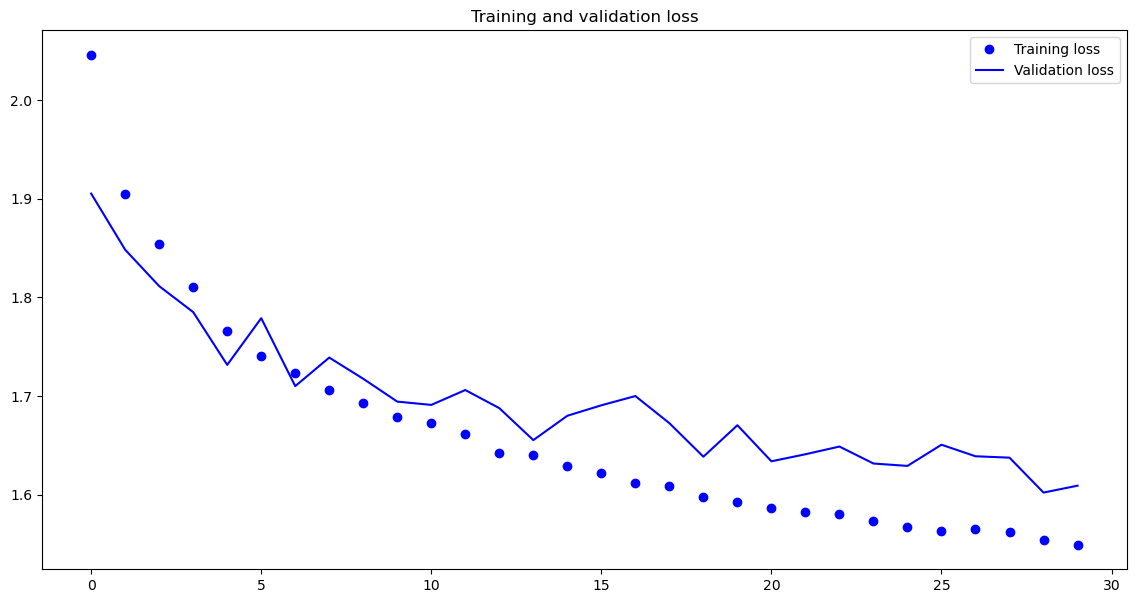

In [18]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))

plt.figure(figsize=PLOT_WIDE)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## 8. Regularização
1. Early Stopping: determinar quando encerrar o treinamento
2. Dropout: selecionar neurônios aleatoriamente para o treinamento

In [19]:
# Setamos os pesos iniciais iguais à versão antes do treinamento pra ter um comparativo mais real.
#rede_simples.set_weights(pesos_iniciais)
historico = rede_simples.fit(x_treino, 
                             y_treino, 
                             epochs = 150, 
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

2023-10-21 16:50:15.986830: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


Epoch 1/150
1250/1250 [==============================] - ETA: 0s - loss: 1.5525 - accuracy: 0.4469

2023-10-21 16:50:22.282618: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


1250/1250 [==============================] - 6s 5ms/step - loss: 1.5525 - accuracy: 0.4469 - val_loss: 1.6361 - val_accuracy: 0.4131
Epoch 2/150
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5501 - accuracy: 0.4452 - val_loss: 1.6066 - val_accuracy: 0.4208
Epoch 3/150
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5459 - accuracy: 0.4487 - val_loss: 1.6202 - val_accuracy: 0.4218
Epoch 4/150
1250/1250 [==============================] - 6s 5ms/step - loss: 1.5397 - accuracy: 0.4507 - val_loss: 1.6122 - val_accuracy: 0.4244
Epoch 5/150
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5356 - accuracy: 0.4524 - val_loss: 1.6218 - val_accuracy: 0.4154
Epoch 6/150
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5294 - accuracy: 0.4568 - val_loss: 1.5997 - val_accuracy: 0.4319
Epoch 7/150
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5297 - accuracy: 0.4525 - val_loss: 1.6267 - val_accuracy: 0.41

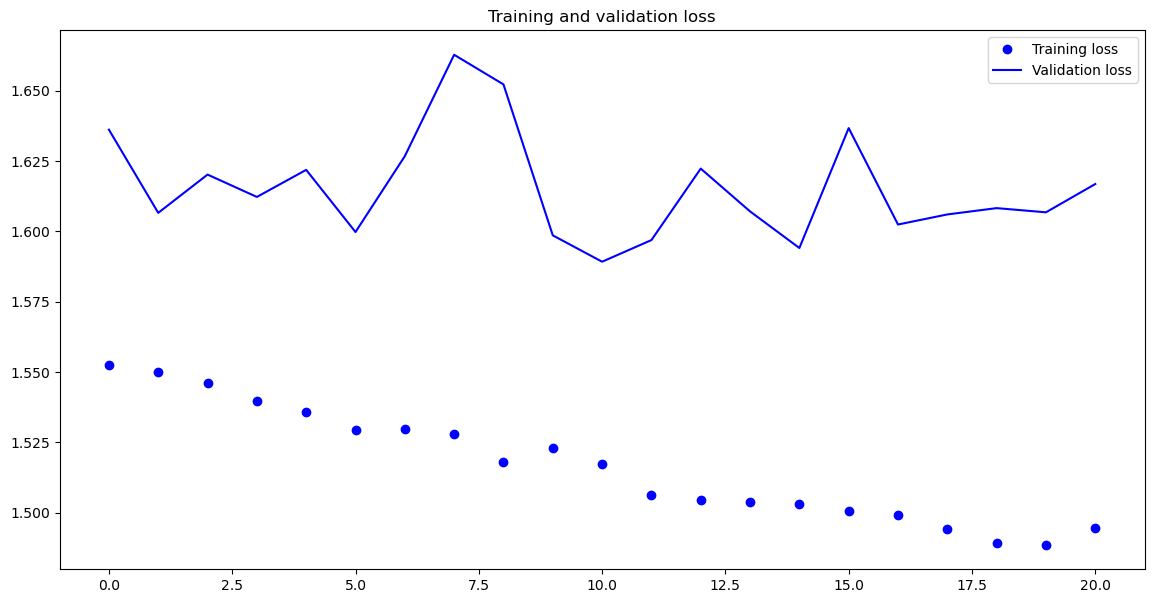

In [20]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure(figsize=PLOT_WIDE)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [21]:
pred_es = rede_simples.predict(x_test)
accuracy_score(y_test.argmax(1), pred_es.argmax(1))

313/313 [==============================] - 1s 2ms/step


0.4196

In [22]:
confusion_matrix(y_test.argmax(1), pred_es.argmax(1))

array([[403,  51,  66,  36,  11,   7,  35,  36, 259,  96],
       [ 31, 537,  21,  27,   7,   9,  27,  29,  70, 242],
       [ 80,  43, 329,  80, 109,  38, 160,  76,  52,  33],
       [ 54,  35, 123, 258,  48, 102, 192,  44,  52,  92],
       [ 66,  20, 183,  53, 297,  32, 182,  87,  47,  33],
       [ 35,  35, 135, 194,  64, 214, 142,  55,  68,  58],
       [  5,  22,  96,  96,  98,  31, 555,  26,  31,  40],
       [ 41,  39, 105,  56,  81,  49,  58, 419,  31, 121],
       [ 80,  92,  15,  27,   6,  12,  13,  15, 644,  96],
       [ 26, 190,   8,  33,   5,  11,  33,  43, 111, 540]])

## Regularização - Dropout

* Alterna quais neurônios vão otimizar os pesos a cada rodada do treinamento

In [23]:
rede_dropout = Sequential()
rede_dropout.add(Flatten())
rede_dropout.add(Dense(25,  input_dim = 784))
rede_dropout.add(Activation('relu'))
rede_dropout.add(Dropout(0.3))
rede_dropout.add(Dense(25))
rede_dropout.add(Activation('relu'))
rede_dropout.add(Dense(25))
rede_dropout.add(Dropout(0.3))
rede_dropout.add(Activation('relu'))
rede_dropout.add(Dense(10))
rede_dropout.add(Activation('softmax'))

rede_dropout.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])


In [24]:
historico = rede_dropout.fit(x_treino, 
                             y_treino, 
                             epochs = 150, 
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
1250/1250 [==============================] - 8s 4ms/step - loss: 2.3037 - accuracy: 0.0971 - val_loss: 2.3030 - val_accuracy: 0.0943
Epoch 2/150
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3029 - val_accuracy: 0.0943
Epoch 3/150
1250/1250 [==============================] - 4s 3ms/step - loss: 2.3028 - accuracy: 0.0998 - val_loss: 2.3029 - val_accuracy: 0.0943
Epoch 4/150
1250/1250 [==============================] - 4s 3ms/step - loss: 2.3028 - accuracy: 0.1006 - val_loss: 2.3030 - val_accuracy: 0.0943
Epoch 5/150
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3028 - accuracy: 0.0994 - val_loss: 2.3029 - val_accuracy: 0.0943
Epoch 6/150
1250/1250 [==============================] - 4s 3ms/step - loss: 2.3028 - accuracy: 0.1012 - val_loss: 2.3029 - val_accuracy: 0.0942
Epoch 7/150
1250/1250 [==============================] - 4s 3ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3028 - val_ac

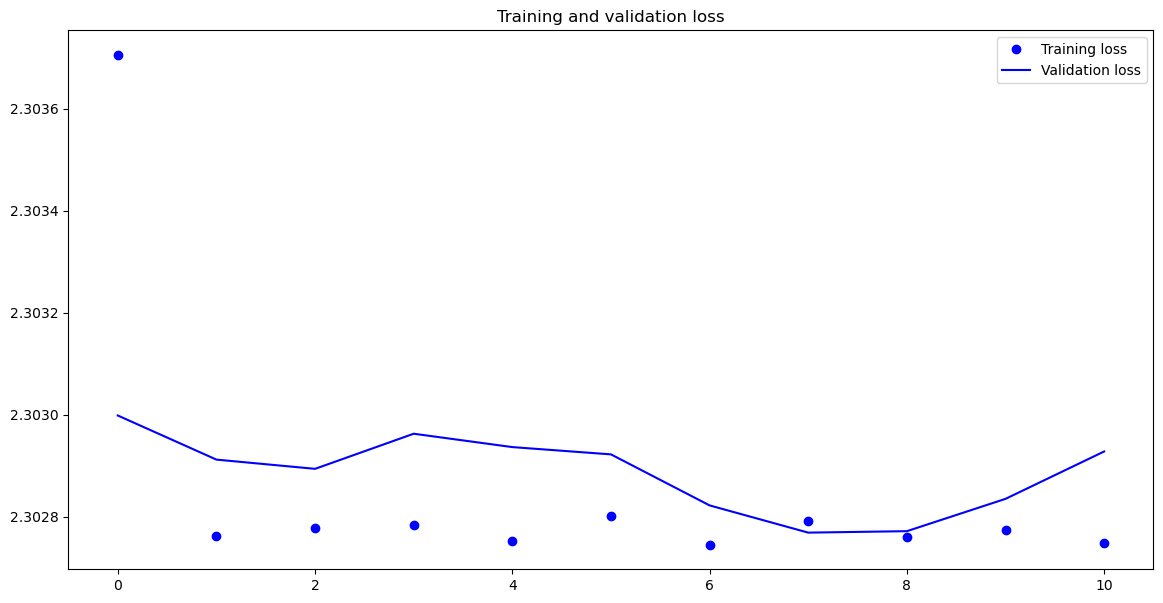

In [25]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure(figsize=PLOT_WIDE)
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [26]:
pred_dropout = rede_dropout.predict(x_test)

accuracy_score(y_test.argmax(1), pred_dropout.argmax(1))

313/313 [==============================] - 0s 1ms/step


0.1

In [27]:
confusion_matrix(y_test.argmax(1), pred_dropout.argmax(1))

array([[   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0]])

# Regressão

In [28]:
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()

In [29]:
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

x_test -= mean
x_test /= std

In [30]:
from sklearn.model_selection import train_test_split

x_treino, x_val, y_treino, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 13)

x_treino.shape, x_val.shape, x_test.shape, y_treino.shape, y_val.shape, y_test.shape, 

((323, 13), (81, 13), (102, 13), (323,), (81,), (102,))

In [31]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_treino.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

In [32]:
es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 10, verbose = 1, mode = 'auto')

historico = model.fit(x_treino, 
                             y_treino, 
                             epochs = 150, 
                             batch_size=64,
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
6/6 [==============================] - 1s 30ms/step - loss: 558.2913 - mae: 21.7757 - val_loss: 487.3586 - val_mae: 19.6827
Epoch 2/150
6/6 [==============================] - 0s 6ms/step - loss: 513.0876 - mae: 20.6803 - val_loss: 449.5874 - val_mae: 18.5970
Epoch 3/150
6/6 [==============================] - 0s 6ms/step - loss: 472.3964 - mae: 19.6586 - val_loss: 409.5447 - val_mae: 17.5335
Epoch 4/150
6/6 [==============================] - 0s 6ms/step - loss: 427.2916 - mae: 18.5431 - val_loss: 362.8175 - val_mae: 16.3045
Epoch 5/150
6/6 [==============================] - 0s 6ms/step - loss: 376.3452 - mae: 17.2237 - val_loss: 318.1836 - val_mae: 15.1189
Epoch 6/150
6/6 [==============================] - 0s 6ms/step - loss: 326.8682 - mae: 15.8269 - val_loss: 275.0144 - val_mae: 13.9224
Epoch 7/150
6/6 [==============================] - 0s 7ms/step - loss: 278.6997 - mae: 14.4031 - val_loss: 227.3035 - val_mae: 12.5326
Epoch 8/150
6/6 [==============================] - 0s 

In [33]:
pred_simples = model.predict(x_test)

4/4 [==============================] - 0s 1ms/step


In [34]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, pred_simples)

3.164362231422873

In [35]:
import pandas as pd

resultado = pd.DataFrame()
resultado['y_test'] = y_test
resultado['y_pred'] = pred_simples

resultado

,y_test,y_pred
0,7.2,8.768511
1,18.8,15.392995
2,19.0,19.905128
3,27.0,32.427425
4,22.2,24.128103
...,...,...
97,21.9,51.232159
98,24.1,25.919458
99,50.0,46.588062
100,26.7,31.375467
